# Exercício 10

## Arthur Magalhães - 12629595

## Atividade 1

Estime redshifts fotométricos usando cores (em relação à banda r_petro) e um algoritmo de sua escolha usando a biblioteca caret. Use o arquivo splus-mag-z.dat.

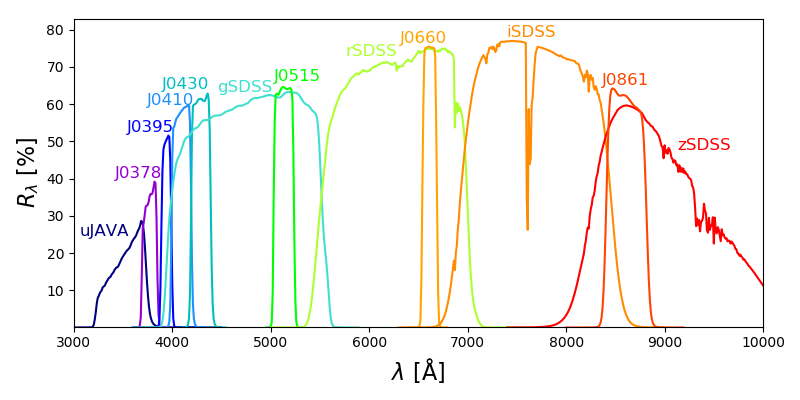

### 1.1. inicialize o programa com uma semente aleatória igual ao seu número USP

In [196]:
set.seed(12629595) #inicializando com NUSP

### 1.2. usando as magnitudes deste arquivo, calcule as cores em relação à banda r_petro, isto é, para uma dada banda i, calcule cori=magi−magr . Crie um novo arquivo de dados com as cores e excluindo a banda r (que terá todos os valores iguais a zero).

- Primeiramente, o arquivo 'splus-mag-z.dat' será lido, e seus dados serão printados. Este arquivo contem 13 colunas, representando as 12 bandas do SPLUS, e mais uma coluna de redshift espectróscopico.

In [197]:
dados = as.data.frame(read.table('splus-mag-z.dat', sep = "", header=TRUE))
# dimensão dos dados:
dim(dados)
head(dados)

[1] 55803    13

,uJAVA_petro,F378_petro,F395_petro,F410_petro,F430_petro,g_petro,F515_petro,r_petro,F660_petro,i_petro,F861_petro,z_petro,z_SDSS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18.71,18.69,18.50,18.12,17.78,17.43,17.09,16.89,16.83,16.56,16.54,16.45,0.111
2,18.26,18.12,18.28,17.32,16.95,16.67,16.24,15.97,15.90,15.61,15.52,15.41,0.082
3,19.38,19.45,18.76,18.60,18.50,18.07,17.69,17.55,17.47,17.25,17.31,17.18,0.086
4,20.30,19.73,20.01,19.18,18.91,18.36,18.00,17.75,17.68,17.51,17.46,17.34,0.111
5,19.49,18.98,18.64,18.64,18.02,17.14,16.61,16.06,15.93,15.65,15.54,15.38,0.162
6,19.86,19.38,18.93,18.75,18.15,17.44,16.94,16.58,16.48,16.24,16.11,16.00,0.082


 - Em seguida, faremos um pequeno corte na tabela, selecionando apenas aqueles casos em que a magnitude 'r_petro' está entre 15 e 20.

In [198]:
# seleção em magnitudes
sel = rep(0, nrow(dados))
sel[dados$r_petro > 15 & dados$r_petro < 20] = 1
sum(sel)

[1] 54313

In [199]:
dados = dados[sel == 1,]
dim(dados)

[1] 54313    13

In [200]:
# topo do arquivo
head(dados)

,uJAVA_petro,F378_petro,F395_petro,F410_petro,F430_petro,g_petro,F515_petro,r_petro,F660_petro,i_petro,F861_petro,z_petro,z_SDSS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18.71,18.69,18.50,18.12,17.78,17.43,17.09,16.89,16.83,16.56,16.54,16.45,0.111
2,18.26,18.12,18.28,17.32,16.95,16.67,16.24,15.97,15.90,15.61,15.52,15.41,0.082
3,19.38,19.45,18.76,18.60,18.50,18.07,17.69,17.55,17.47,17.25,17.31,17.18,0.086
4,20.30,19.73,20.01,19.18,18.91,18.36,18.00,17.75,17.68,17.51,17.46,17.34,0.111
5,19.49,18.98,18.64,18.64,18.02,17.14,16.61,16.06,15.93,15.65,15.54,15.38,0.162
6,19.86,19.38,18.93,18.75,18.15,17.44,16.94,16.58,16.48,16.24,16.11,16.00,0.082


 - Como estamos interessados apenas em explorar o pacote e algumas de suas principais funções, vamos restringir o número de objetos para 10000:

In [201]:
nsample = 10000

# magnitudes
mags = dados[1:nsample,1:12]

# redshift
zspec = dados[1:nsample,13]



 - Agora, iremos tranformar a tabela de magnitudes em uma tabela de cores em relação à magnitude r_petro. Para isso, iremos fazer a subtração de cada coluna de magnitude com a coluna de magnitude r_petro. Com isso teremo cda coluna como a subtração das anteriores, a coluna de r_petro zerada, e a coluna de redshift intacta.

In [202]:
colunas = names(dados)
rpetro = dados[8]

for(i in 1:(length(dados)-1)){dados[i] = dados[i]-rpetro}
head(dados)

,uJAVA_petro,F378_petro,F395_petro,F410_petro,F430_petro,g_petro,F515_petro,r_petro,F660_petro,i_petro,F861_petro,z_petro,z_SDSS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.82,1.80,1.61,1.23,0.89,0.54,0.20,0,-0.06,-0.33,-0.35,-0.44,0.111
2,2.29,2.15,2.31,1.35,0.98,0.70,0.27,0,-0.07,-0.36,-0.45,-0.56,0.082
3,1.83,1.90,1.21,1.05,0.95,0.52,0.14,0,-0.08,-0.30,-0.24,-0.37,0.086
4,2.55,1.98,2.26,1.43,1.16,0.61,0.25,0,-0.07,-0.24,-0.29,-0.41,0.111
5,3.43,2.92,2.58,2.58,1.96,1.08,0.55,0,-0.13,-0.41,-0.52,-0.68,0.162
6,3.28,2.80,2.35,2.17,1.57,0.86,0.36,0,-0.10,-0.34,-0.47,-0.58,0.082


In [203]:
dados <- dados[ -c(8) ] #excluindo a linha de valores nulos
head(dados)

,uJAVA_petro,F378_petro,F395_petro,F410_petro,F430_petro,g_petro,F515_petro,F660_petro,i_petro,F861_petro,z_petro,z_SDSS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.82,1.80,1.61,1.23,0.89,0.54,0.20,-0.06,-0.33,-0.35,-0.44,0.111
2,2.29,2.15,2.31,1.35,0.98,0.70,0.27,-0.07,-0.36,-0.45,-0.56,0.082
3,1.83,1.90,1.21,1.05,0.95,0.52,0.14,-0.08,-0.30,-0.24,-0.37,0.086
4,2.55,1.98,2.26,1.43,1.16,0.61,0.25,-0.07,-0.24,-0.29,-0.41,0.111
5,3.43,2.92,2.58,2.58,1.96,1.08,0.55,-0.13,-0.41,-0.52,-0.68,0.162
6,3.28,2.80,2.35,2.17,1.57,0.86,0.36,-0.10,-0.34,-0.47,-0.58,0.082


In [232]:
#vamos mudar os nomes das colunas 

cols = names(dados) 

colnames(dados) <- c('u - r','F378 - r','F395 - r', 'F410 - r', 'F430 -r' , 'g-r', 'F515 - r' , 'F660 - r', 'i-r' , 'F861 - r' , 'z - r', 'z_SDSS')

head(dados)

,u - r,F378 - r,F395 - r,F410 - r,F430 -r,g-r,F515 - r,F660 - r,i-r,F861 - r,z - r,z_SDSS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.82,1.80,1.61,1.23,0.89,0.54,0.20,-0.06,-0.33,-0.35,-0.44,0.111
2,2.29,2.15,2.31,1.35,0.98,0.70,0.27,-0.07,-0.36,-0.45,-0.56,0.082
3,1.83,1.90,1.21,1.05,0.95,0.52,0.14,-0.08,-0.30,-0.24,-0.37,0.086
4,2.55,1.98,2.26,1.43,1.16,0.61,0.25,-0.07,-0.24,-0.29,-0.41,0.111
5,3.43,2.92,2.58,2.58,1.96,1.08,0.55,-0.13,-0.41,-0.52,-0.68,0.162
6,3.28,2.80,2.35,2.17,1.57,0.86,0.36,-0.10,-0.34,-0.47,-0.58,0.082


### 1.3. pré-processamento dos dados: normalize as cores com padronização: subtraia a média e divida pelo desvio padrão

- Nesta etapa iremos prepara nosso dados, de forma a melhorar o desempenho do algoritimo. Para isso vamos reescalonar as variáveis entre 0 e 1, subtrair a média de cada variável e dividir por seu desvio padrão. Temos então:

In [205]:
nsample = 10000

# magnitudes
cores = dados[1:nsample,1:11]

# redshift
zspec = dados[1:nsample,12]


In [206]:
# valores máximos e mínimos de cada banda
maxs <- apply(cores, 2, max) 
mins <- apply(cores, 2, min)

In [207]:
# reescalonamento usando a função scale():
colornorm <- as.data.frame(scale(cores, center = mins, scale = maxs - mins))

# exemplo de dados normalizados
summary(colornorm[,1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2623  0.2968  0.3067  0.3436  1.0000 

### 1.4. crie conjuntos de treinamento e teste com 80% dos objetos para treinamento e 20% para teste

- Agora iremos separar 80% da amostra para serem objetos do conjunto de treinamento e 20% para o conjunto de teste.

In [179]:
library(caret)
# número das linhas dos objetos selecionados para o conjunto de treinamento
# usamos a função createDataPartition()
numlinhastreinamento =  createDataPartition(zspec, p=0.80, list=FALSE)

# conjunto de treinamento:
xtrain=colornorm[numlinhastreinamento,]
ytrain=zspec[numlinhastreinamento]

# conjunto de teste
xtest=colornorm[-numlinhastreinamento,]
ytest=zspec[-numlinhastreinamento]

### 1.5. escolha um algoritmo de regressão do caret e o explique brevemente

 - Para este exercício eu utilizei o algorítimo **Random Forest (rf)**.
 
 Random Forest é um algorítimo de Machine Learning muito usado atualmente. Ele consiste de uma combinação de múltiplas **decision trees** (árvores de decisão), para que o output do conjunto chegue em um resultado único. Portanto, é um algorítimo poderoso e mais complexo, por ser formada de muitas partes de um algorismo básico. Por este motivo, o tempo qeu foi necessário para rodar neste arquivo foi de 1.067824 horas.

In [180]:
#você pode saber um pouco mais sobre um modelo com o comando `modelLookup:
modelLookup('rf')

xtrain
ytrain

,model,parameter,label,forReg,forClass,probModel
,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
1,rf,mtry,#Randomly Selected Predictors,TRUE,TRUE,TRUE


,u - r,F378 - r,F395 -,F410 - r,F430 -r,g-r,F515 - r,F660 - r,i-r,F861 - r,z - r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2868098,0.3666667,0.3062827,0.3039832,0.3276047,0.3060109,0.2940379,0.6065574,0.8825911,0.6216216,0.8343634
2,0.3228528,0.4000000,0.3673647,0.3165618,0.3372718,0.3497268,0.3035230,0.6010929,0.8785425,0.5830116,0.8195303
3,0.2875767,0.3761905,0.2713787,0.2851153,0.3340494,0.3005464,0.2859079,0.5956284,0.8866397,0.6640927,0.8430161
4,0.3427914,0.3838095,0.3630017,0.3249476,0.3566058,0.3251366,0.3008130,0.6010929,0.8947368,0.6447876,0.8380717
5,0.4102761,0.4733333,0.3909250,0.4454927,0.4425349,0.4535519,0.3414634,0.5683060,0.8717949,0.5559846,0.8046972
6,0.3987730,0.4619048,0.3708551,0.4025157,0.4006445,0.3934426,0.3157182,0.5846995,0.8812416,0.5752896,0.8170581
7,0.2768405,0.4028571,0.3656195,0.3029350,0.3662728,0.3196721,0.3008130,0.5901639,0.8758435,0.6370656,0.8257108
8,0.3174847,0.3809524,0.3795812,0.3092243,0.3759398,0.3797814,0.3360434,0.6065574,0.8731444,0.5907336,0.8145859
9,0.2446319,0.3295238,0.2513089,0.2641509,0.3372718,0.2513661,0.2398374,0.6994536,0.9257760,0.6525097,0.8949320


[1] 0.111 0.082 0.086 0.111 0.162 0.082 0.266 0.159 0.197 0.127 0.110 0.125
  [13] 0.163 0.057 0.103 0.109 0.075 0.112 0.078 0.187 0.032 0.186 0.127 0.176
  [25] 0.163 0.127 0.248 0.086 0.064 0.039 0.243 0.226 0.079 0.063 0.082 0.084
  [37] 0.093 0.196 0.034 0.076 0.162 0.247 0.201 0.064 0.178 0.196 0.064 0.248
  [49] 0.084 0.109 0.022 0.191 0.110 0.226 0.087 0.160 0.163 0.076 0.082 0.100
  [61] 0.083 0.193 0.192 0.139 0.110 0.245 0.162 0.081 0.162 0.111 0.281 0.192
  [73] 0.105 0.076 0.439 0.085 0.151 0.085 0.077 0.193 0.150 0.084 0.139 0.202
  [85] 0.085 0.085 0.368 0.100 0.109 0.250 0.177 0.192 0.063 0.249 0.079 0.246
  [97] 0.193 0.150 0.247 0.272 0.128 0.128 0.179 0.109 0.191 0.127 0.105 0.177
 [109] 0.112 0.079 0.110 0.246 0.229 0.143 0.143 0.103 0.078 0.140 0.141 0.142
 [121] 0.087 0.141 0.076 0.282 0.412 0.141 0.076 0.105 0.191 0.140 0.189 0.109
 [133] 0.076 0.110 0.142 0.128 0.191 0.111 0.314 0.190 0.248 0.034 0.074 0.339
 [145] 0.033 0.027 0.144 0.077 0.131 0.162 0.082 0.089 0.080 0.189 0.084 0.079
 [157] 0.079 0.110 0.082 0.248 0.286 0.245 0.246 0.242 0.247 0.128 0.063 0.102
 [169] 0.390 0.110 0.102 0.079 0.086 0.074 0.062 0.102 0.247 0.139 0.195 0.104
 [181] 0.197 0.073 0.074 0.196 0.107 0.149 0.103 0.240 0.214 0.093 0.090 0.224
 [193] 0.126 0.111 0.062 0.108 0.126 0.108 0.461 0.109 0.299 0.108 0.090 0.107
 [205] 0.106 0.107 0.087 0.107 0.089 0.199 0.110 0.110 0.248 0.078 0.189 0.108
 [217] 0.076 0.076 0.123 0.104 0.083 0.083 0.110 0.078 0.074 0.090 0.250 0.414
 [229] 0.149 0.298 0.101 0.076 0.370 0.078 0.084 0.126 0.140 0.104 0.078 0.152
 [241] 0.128 0.250 0.186 0.215 0.084 0.297 0.194 0.178 0.111 0.079 0.291 0.229
 [253] 0.372 0.110 0.111 0.112 0.187 0.143 0.149 0.250 0.083 0.078 0.294 0.083
 [265] 0.195 0.178 0.194 0.290 0.038 0.110 0.152 0.195 0.187 0.194 0.044 0.101
 [277] 0.317 0.103 0.110 0.250 0.149 0.190 0.111 0.063 0.076 0.044 0.112 0.219
 [289] 0.178 0.090 0.191 0.088 0.140 0.245 0.086 0.045 0.078 0.106 0.247 0.078
 [301] 0.078 0.087 0.427 0.112 0.088 0.142 0.113 0.045 0.188 0.284 0.027 0.086
 [313] 0.109 0.103 0.089 0.111 0.193 0.081 0.197 0.179 0.414 0.084 0.079 0.107
 [325] 0.164 0.300 0.106 0.106 0.194 0.079 0.079 0.075 0.126 0.074 0.107 0.190
 [337] 0.062 0.262 0.089 0.470 0.245 0.195 0.267 0.082 0.229 0.189 0.038 0.062
 [349] 0.024 0.024 0.190 0.301 0.128 0.111 0.038 0.085 0.105 0.253 0.105 0.179
 [361] 0.212 0.039 0.177 0.180 0.084 0.180 0.038 0.110 0.256 0.084 0.259 0.187
 [373] 0.219 0.110 0.074 0.195 0.079 0.081 0.197 0.080 0.164 0.091 0.081 0.260
 [385] 0.301 0.091 0.200 0.139 0.182 0.130 0.080 0.196 0.253 0.088 0.054 0.110
 [397] 0.110 0.063 0.191 0.179 0.077 0.061 0.160 0.088 0.189 0.080 0.110 0.092
 [409] 0.080 0.271 0.081 0.245 0.083 0.185 0.254 0.104 0.128 0.182 0.080 0.145
 [421] 0.061 0.061 0.077 0.063 0.079 0.081 0.074 0.109 0.080 0.081 0.111 0.262
 [433] 0.386 0.146 0.074 0.063 0.080 0.300 0.096 0.081 0.150 0.087 0.081 0.109
 [445] 0.081 0.062 0.081 0.141 0.078 0.075 0.061 0.023 0.256 0.062 0.063 0.080
 [457] 0.104 0.148 0.104 0.518 0.099 0.039 0.514 0.248 0.298 0.128 0.128 0.148
 [469] 0.252 0.079 0.083 0.062 0.079 0.080 0.083 0.104 0.280 0.085 0.082 0.099
 [481] 0.088 0.249 0.081 0.139 0.192 0.075 0.082 0.037 0.286 0.063 0.080 0.103
 [493] 0.063 0.062 0.320 0.192 0.083 0.099 0.083 0.075 0.082 0.221 0.084 0.082
 [505] 0.330 0.207 0.341 0.062 0.088 0.082 0.081 0.080 0.139 0.096 0.205 0.061
 [517] 0.082 0.107 0.080 0.208 0.108 0.191 0.228 0.108 0.106 0.042 0.451 0.207
 [529] 0.196 0.082 0.081 0.063 0.061 0.111 0.082 0.266 0.096 0.164 0.264 0.080
 [541] 0.061 0.086 0.106 0.063 0.081 0.080 0.061 0.124 0.061 0.080 0.111 0.434
 [553] 0.081 0.081 0.124 0.081 0.061 0.061 0.061 0.331 0.061 0.061 0.099 0.250
 [565] 0.053 0.120 0.101 0.207 0.085 0.081 0.261 0.086 0.207 0.270 0.082 0.206
 [577] 0.262 0.240 0.123 0.061 0.226 0.249 0.086 0.099 0.321 0.086 0.061 0.186
 [589] 0.087 0.089 0.249 0.086 0.086 0.096 0.205 0.208 0.081 0.054 0.085 0.178
 [601] 0.061 0.080 0.082 0.206 0.054 0.089 0.191 0.08

### 1.6. treine o modelo, faça predições com o conjunto de teste e compare o resultado (usando σG) com o obtido com as 12 magnitudes

 - Primeiramente irei utiliar os conjuntos de dados de treinamento definidos anteriormente, com 80% dos dados totais, para treinar o modelo.

In [187]:
# rf pode ser usada em regressão e classificação e seu parâmetro é o tamanho do subconjunto de magnitudes que vai ser usado; vamos deixar ele livre para o próprio algoritmo escolher

# treinando o modelo- vejam a sintaxe do comando
# pode-se mudar o modelo mudando apenas o parâmetro method
# note que o conjunto de teste não participa do treinamento
t0 = Sys.time()

# note como se treina modelos com o caret: com train()
model_rf<-train(xtrain,ytrain,method='rf')

# tempo que levou para rodar o modelo:
Sys.time() - t0

Time difference of 1.067824 hours

In [190]:
# sumário do modelo
print(model_rf)

Random Forest 

8001 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 8001, 8001, 8001, 8001, 8001, 8001, ... 
Resampling results across tuning parameters:

  mtry  RMSE        Rsquared   MAE       
   2    0.05320820  0.6725281  0.03622566
   6    0.05321552  0.6683823  0.03577058
  11    0.05411231  0.6562929  0.03611663

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.


- Podemos ver que de 11 Predictors, o escolhido como melhor foi o 2

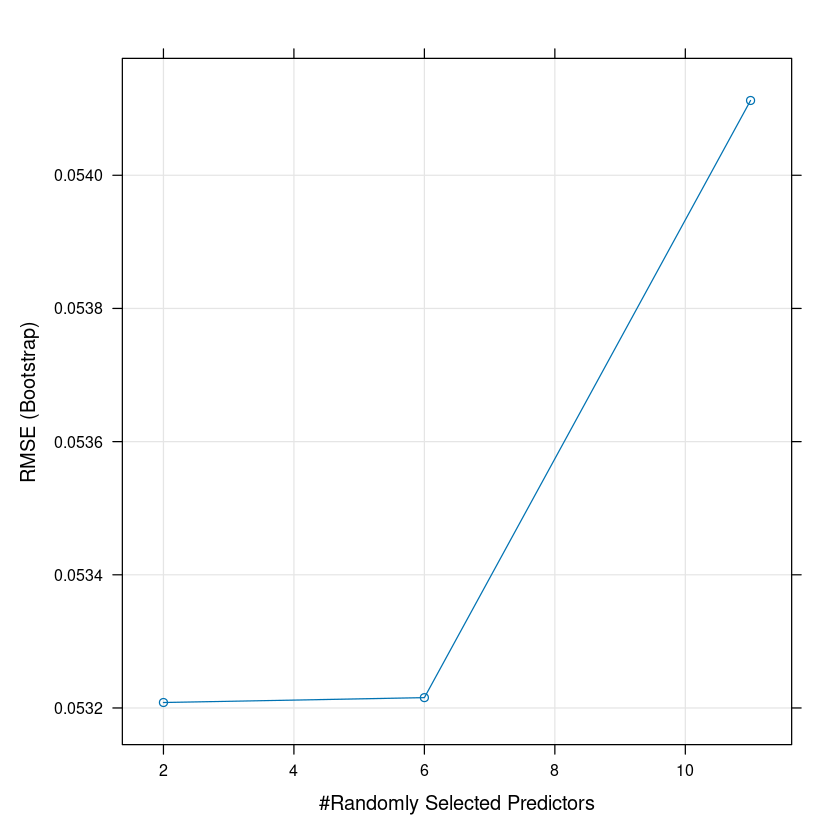

In [208]:
plot(model_rf)

In [209]:
# o melhor subconjunto tem 2 magnitudes
# a predição será feita com um conjunto de árvores com 2 magnitudes escolhidas aleatoriamente entre as 2

# predição com o conjunto de teste
pred_rf = predict(model_rf, xtest)

# estatística da performance do algoritmo
# sigma equivalente da gaussiana
relz = (ytest - pred_rf)
sig_G = 0.7413*(quantile(relz,0.80,names = FALSE) - quantile(relz,0.20,names = FALSE))
sig_G

[1] 0.04928698

In [210]:
#visualização do resultado
# vamos juntar os valores preditos e observados do redshift em um fata frame:
my_data = as.data.frame(cbind(observed = ytest,predicted = pred_rf))
head(my_data)     

,observed,predicted
,<dbl>,<dbl>
10,0.078,0.08821210
14,0.110,0.09429007
29,0.194,0.14090110
33,0.083,0.09329497
35,0.150,0.12928133
36,0.077,0.09142893


`geom_smooth()` using formula = 'y ~ x'


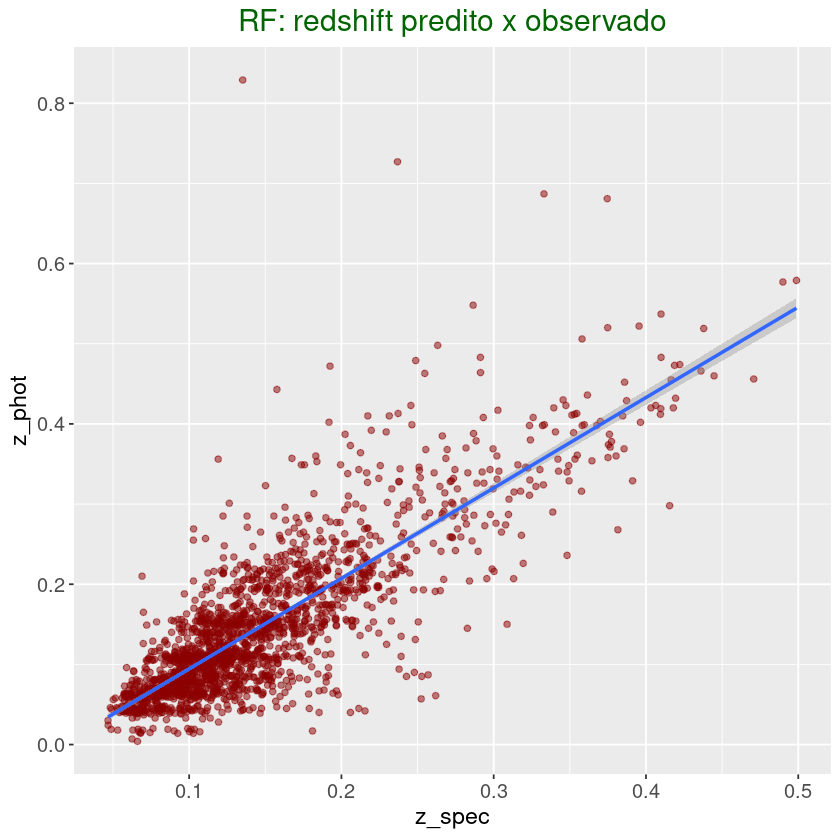

In [211]:
# figura com ggplot
ggplot(my_data,aes(predicted, observed)) +
      geom_point(color = "darkred", alpha = 0.5) + 
      geom_smooth(method=lm)+ 
      ggtitle("RF: redshift predito x observado") +
      xlab("z_spec") +
      ylab("z_phot") +
      theme(plot.title = element_text(color="darkgreen",size=18,hjust = 0.5),
                     axis.text.y = element_text(size=12),
            axis.text.x = element_text(size=12,hjust=.5),
                      axis.title.x = element_text(size=14),
                      axis.title.y = element_text(size=14))

 - O valor encontrado para o σG neste caso foi de 0.0492870 , enquanto o encontrado utilizando as 12 magnitudes foi de 0.034966. 


## Atividade 2 

Resolva o problema da classificação estrela/galáxia acima usando cores, o algoritmo gbm e um outro de sua escolha. Inicialize o programa com uma semente aleatória igual ao seu número USP. Compare o resultado com os obtidos acima com magnitudes.

In [212]:
set.seed(12629595) #iniciando o programa com uma semente aleatorio do meu NUSP

 - Primeiramente vamos abrir o arquivo "dadosparaestrelagalaxia.dat", que contem 12 colunas de magnitudes do SPLUS mais uma coluna de classe, em que: 0 (Estrela) e 1 (Galáxia).

In [215]:
#tabela = as.data.frame(read.table(file="class_estr_gal.dat", header=TRUE))
tabela = as.data.frame(read.table(file="dadosparaestrelagalaxia.dat", header=TRUE))

# alguns detalhes dos dados
dim(tabela)
head(tabela)

[1] 10000    13

,u_petro,J0378_petro,J0395_petro,J0410_petro,J0430_petro,g_petro,J0515_petro,r_petro,J0660_petro,i_petro,J0861_petro,z_petro,classe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,18.57333,17.99002,18.02439,18.09809,17.92609,17.28233,16.99983,16.53974,16.47142,16.21496,16.00299,15.91366,1
2,17.14259,16.78725,16.52434,16.22606,15.83635,15.33351,15.02085,14.59325,14.48909,14.15851,13.96557,13.90085,1
3,18.60449,18.16562,17.87111,17.58500,17.17834,16.74320,16.53280,16.07838,15.98695,15.69374,15.49386,15.44834,1
4,16.74094,16.38911,16.28852,15.96590,15.66112,15.34018,15.18092,14.70637,14.63379,14.39819,14.20232,14.10782,1
5,18.92666,18.72918,18.54957,17.53203,17.32281,16.68435,16.57145,15.87334,15.76929,15.59096,15.50189,15.46906,0
6,17.54627,17.25873,17.20477,16.65028,16.57487,16.22518,16.05884,15.74276,15.70845,15.61446,15.59427,15.56725,0


 - Em classificação é sempre útil se trabalhar com conjuntos de treinamento com o mesmo número de objetos por classe, portanto vamos medir a quantidade de fontes com classe 0 e com classe 1. 

In [218]:
length(tabela$classe[tabela$classe == 0])
length(tabela$classe[tabela$classe == 1])

## Mesmo tamanho!!

[1] 5000

[1] 5000

 - Em seguida, irei repetir um processo semelhante ao realizado no exercicio anterior, de forma a transformar a tabela de magnitudes em tabela de cores. Temos então:

In [219]:
# definindo os features
mag = tabela[,1:12]


In [221]:
r= tabela[8]

for(i in 1:(length(tabela)-1)){tabela[i] = tabela[i]-r}
head(tabela)

,u_petro,J0378_petro,J0395_petro,J0410_petro,J0430_petro,g_petro,J0515_petro,r_petro,J0660_petro,i_petro,J0861_petro,z_petro,classe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2.033595,1.450280,1.484651,1.5583498,1.3863542,0.7425905,0.4600954,0,-0.06831179,-0.3247797,-0.5367425,-0.6260784,1
2,2.549343,2.194004,1.931094,1.6328131,1.2430982,0.7402599,0.4275976,0,-0.10415852,-0.4347409,-0.6276824,-0.6923957,1
3,2.526107,2.087241,1.792728,1.5066213,1.0999586,0.6648177,0.4544213,0,-0.09142985,-0.3846402,-0.5845166,-0.6300403,1
4,2.034576,1.682748,1.582153,1.2595376,0.9547523,0.6338126,0.4745513,0,-0.07258007,-0.3081800,-0.5040491,-0.5985488,1
5,3.053311,2.855833,2.676227,1.6586837,1.4494631,0.8110097,0.6981026,0,-0.10405375,-0.2823865,-0.3714500,-0.4042804,0
6,1.803514,1.515973,1.462008,0.9075182,0.8321115,0.4824153,0.3160796,0,-0.03430875,-0.1283052,-0.1484907,-0.1755099,0


In [223]:
tabela <- tabela[ -c(8) ] #excluindo a linha de valores nulos
head(tabela)

,u_petro,J0378_petro,J0395_petro,J0410_petro,J0430_petro,g_petro,J0515_petro,J0660_petro,i_petro,J0861_petro,z_petro,classe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2.033595,1.450280,1.484651,1.5583498,1.3863542,0.7425905,0.4600954,-0.06831179,-0.3247797,-0.5367425,-0.6260784,1
2,2.549343,2.194004,1.931094,1.6328131,1.2430982,0.7402599,0.4275976,-0.10415852,-0.4347409,-0.6276824,-0.6923957,1
3,2.526107,2.087241,1.792728,1.5066213,1.0999586,0.6648177,0.4544213,-0.09142985,-0.3846402,-0.5845166,-0.6300403,1
4,2.034576,1.682748,1.582153,1.2595376,0.9547523,0.6338126,0.4745513,-0.07258007,-0.3081800,-0.5040491,-0.5985488,1
5,3.053311,2.855833,2.676227,1.6586837,1.4494631,0.8110097,0.6981026,-0.10405375,-0.2823865,-0.3714500,-0.4042804,0
6,1.803514,1.515973,1.462008,0.9075182,0.8321115,0.4824153,0.3160796,-0.03430875,-0.1283052,-0.1484907,-0.1755099,0


In [231]:
colnames(tabela) <- c('u - r','J0378 - r','J0395-r', 'J0410 - r', 'J0430 -r' , 'g-r', 'J0515 - r' , 'J0660 - r', 'i-r' , 'J0861 - r' , 'z - r', 'classe')

head(tabela)

,u - r,J0378 - r,J0395-r,J0410 - r,J0430 -r,g-r,J0515 - r,J0660 - r,i-r,J0861 - r,z - r,classe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2.033595,1.450280,1.484651,1.5583498,1.3863542,0.7425905,0.4600954,-0.06831179,-0.3247797,-0.5367425,-0.6260784,1
2,2.549343,2.194004,1.931094,1.6328131,1.2430982,0.7402599,0.4275976,-0.10415852,-0.4347409,-0.6276824,-0.6923957,1
3,2.526107,2.087241,1.792728,1.5066213,1.0999586,0.6648177,0.4544213,-0.09142985,-0.3846402,-0.5845166,-0.6300403,1
4,2.034576,1.682748,1.582153,1.2595376,0.9547523,0.6338126,0.4745513,-0.07258007,-0.3081800,-0.5040491,-0.5985488,1
5,3.053311,2.855833,2.676227,1.6586837,1.4494631,0.8110097,0.6981026,-0.10405375,-0.2823865,-0.3714500,-0.4042804,0
6,1.803514,1.515973,1.462008,0.9075182,0.8321115,0.4824153,0.3160796,-0.03430875,-0.1283052,-0.1484907,-0.1755099,0


- Em seguida vamos fazer o preparamento dos dados, de forma a normalizar todo o conjunto e definir 75% como conjunto de treinamento e 25% como conjunto de  teste.

In [234]:
# definindo os features
colors = tabela[,1:11]

# pré-processamento: normalização das magnitudes entre 0 e 1
maxs <- apply(colors, 2, max) 
mins <- apply(colors, 2, min)
normalizacao <- as.data.frame(scale(colors, center = mins, scale = maxs - mins))

In [235]:
# conjuntos de treinamento (75%) e teste (25%):
ntreino = round(0.75*nrow(tabela))
nteste = nrow(tabela)-ntreino
c(ntreino,nteste)

[1] 7500 2500

In [260]:

# número das linhas dos objetos selecionados para o conjunto de treinamento
indice =  createDataPartition(tabela$classe, p=0.75, list=FALSE)
xtrain = normalizacao[indice,]

# ATENÇÃO: para classificação a variável dependente deve ser tipo 'factor'
ytrain = as.factor(tabela[indice,12])

xtest = normalizacao[-indice,]
ytest = as.factor(tabela[-indice,12])


 - Neste momento, todos os dados já estão processados e preparados, prontos para serem analisados por algum algorítimo de classificação. 
 - Como foi pedido no enunciado, irei resolver o problema utilizando o algoritimo gbm e outro de minha escolha. O algorítimo de minha escolha foi o SVM.
 
 - Primeiramente irei resolver com o SVM e no final com gbm. Temos então:
 
 
 ### SVM

In [237]:
modelLookup('svmRadial')

,model,parameter,label,forReg,forClass,probModel
,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
1,svmRadial,sigma,Sigma,TRUE,TRUE,TRUE
2,svmRadial,C,Cost,TRUE,TRUE,TRUE


In [238]:
# note que a sintaxe d a função train() é a mesma em problemas de classificação e regressão
t0 = Sys.time()
model_svm <- train(xtrain,ytrain,method='svmRadial',
                      tuneLength = 10,
                      trControl = trainControl(method = "cv"))
Sys.time()-t0

Time difference of 49.11622 secs

In [239]:
# modelo ajustado:
model_svm

Support Vector Machines with Radial Basis Function Kernel 

7500 samples
  11 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 6750, 6750, 6750, 6750, 6750, 6750, ... 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.9666667  0.9333333
    0.50  0.9682667  0.9365333
    1.00  0.9682667  0.9365333
    2.00  0.9682667  0.9365333
    4.00  0.9681333  0.9362667
    8.00  0.9689333  0.9378667
   16.00  0.9684000  0.9368000
   32.00  0.9669333  0.9338667
   64.00  0.9669333  0.9338667
  128.00  0.9654667  0.9309333

Tuning parameter 'sigma' was held constant at a value of 0.4102738
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.4102738 and C = 8.

In [273]:
pred_svm = predict(model_svm, xtest)
pred_svm

[1] 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
  [38] 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1
  [75] 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0
 [112] 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0
 [149] 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1
 [186] 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1
 [223] 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0
 [260] 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 [297] 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1
 [334] 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0
 [371] 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1
 [408] 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0
 [445] 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1
 [482] 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1
 [519] 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0
 [556] 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1
 [630] 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0
 [667] 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0
 [704] 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0
 [741] 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1
 [778] 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1
 [815] 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0
 [852] 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 [889] 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 [926] 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1
 [963] 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1
[1000] 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0
[1037] 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1
[1074] 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0
[1111] 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1
[1148] 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1
[1185] 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
[1222] 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0
[1259] 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1
[1296] 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1
[1333] 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1
[1370] 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0
[1407] 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1
[1444] 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0
[1481] 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0
[1518] 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0
[1555] 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0
[1592] 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1
[1629] 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0
[1666] 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
[1703] 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1
[1740] 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0
[1777] 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1
[1814] 0 1 0 1 0 1 1 0 1 1 1 0 1 1

In [274]:
postResample(pred = pred_svm ,obs= ytest)

Accuracy    Kappa 
   0.972    0.944

In [277]:
# matriz de confusão
# TPR (True Positive Rate) = TP/(TP+FN)
# FPR (False Positive Rate) = FP/(TN+FP)
print(confusionMatrix(data = as.factor(pred_svm),reference = as.factor(ytest),positive = '1'))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1243   63
         1    7 1187
                                          
               Accuracy : 0.972           
                 95% CI : (0.9648, 0.9781)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.944           
                                          
 Mcnemar's Test P-Value : 4.906e-11       
                                          
            Sensitivity : 0.9496          
            Specificity : 0.9944          
         Pos Pred Value : 0.9941          
         Neg Pred Value : 0.9518          
             Prevalence : 0.5000          
         Detection Rate : 0.4748          
   Detection Prevalence : 0.4776          
      Balanced Accuracy : 0.9720          
                                          
       'Positive' Class : 1               
                        

In [279]:
tab = table(pred_svm, ytest)
# essa função calcula a acurácia 
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 97.2

- Podemos ver que o SVM foi efetivo para a classificação dos dados, apresentando uma acurácia de **97.2%**.

## gbm

In [249]:
modelLookup(model='gbm')

,model,parameter,label,forReg,forClass,probModel
,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
1,gbm,n.trees,# Boosting Iterations,TRUE,TRUE,TRUE
2,gbm,interaction.depth,Max Tree Depth,TRUE,TRUE,TRUE
3,gbm,shrinkage,Shrinkage,TRUE,TRUE,TRUE
4,gbm,n.minobsinnode,Min. Terminal Node Size,TRUE,TRUE,TRUE


In [251]:
fitControl <- trainControl(
  method = "repeatedcv",
  number = 3,
  repeats = 3)

In [252]:
grade = expand.grid(n.trees=c(10,100,1000),shrinkage=c(0.01,0.05,0.1,0.5),n.minobsinnode = c(3,5,10),interaction.depth=c(1,5,10))


In [261]:
set.seed(12629595)

t0 = Sys.time()
model_gbm<-train(xtrain,ytrain,method='gbm',trControl=fitControl,tuneGrid=grade,verbose = FALSE)
Sys.time() - t0

Time difference of 17.9411 mins

,var,rel.inf
,<chr>,<dbl>
z - r,z - r,37.212249
J0515 - r,J0515 - r,30.420369
J0861 - r,J0861 - r,7.859263
J0430 -r,J0430 -r,5.977578
J0378 - r,J0378 - r,4.128655
u - r,u - r,4.113171
i-r,i-r,2.579632
J0395-r,J0395-r,2.516042
J0660 - r,J0660 - r,1.815340


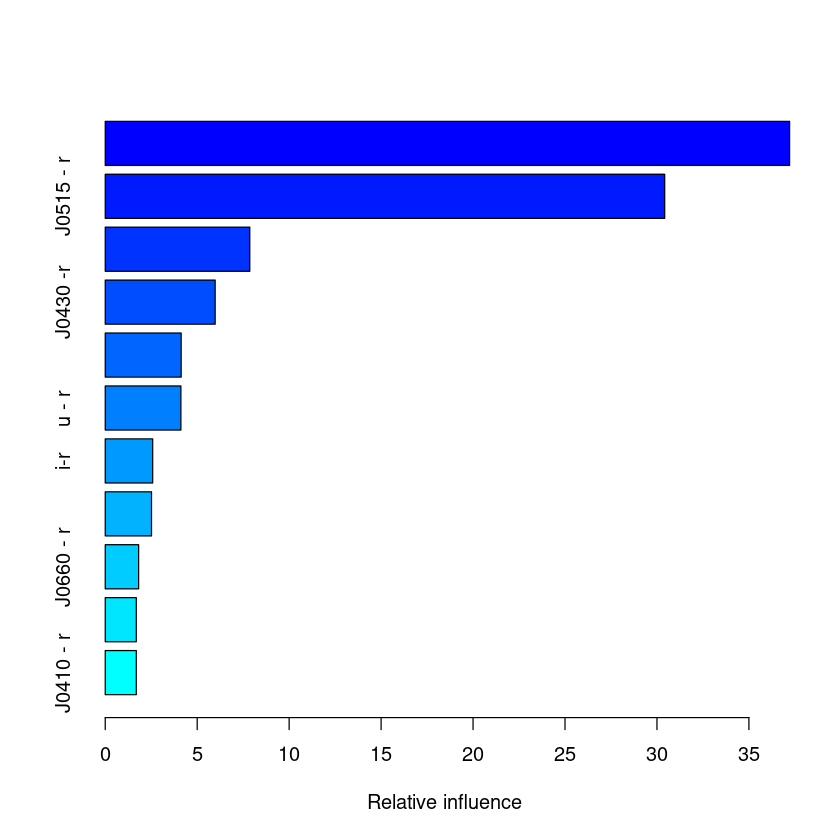

In [263]:
summary(model_gbm)

In [275]:
# predição com o conjunto de teste
pred_gbm = predict(model_gbm, xtest)
pred_gbm

[1] 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
  [38] 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1
  [75] 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0
 [112] 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0
 [149] 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1
 [186] 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1
 [223] 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 [260] 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 [297] 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1
 [334] 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0
 [371] 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1
 [408] 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0
 [445] 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1
 [482] 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1
 [519] 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0
 [556] 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1
 [630] 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0
 [667] 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0
 [704] 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0
 [741] 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1
 [778] 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1
 [815] 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 [852] 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 [889] 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 [926] 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1
 [963] 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1
[1000] 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0
[1037] 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1
[1074] 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0
[1111] 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1
[1148] 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1
[1185] 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
[1222] 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0
[1259] 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1
[1296] 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1
[1333] 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1
[1370] 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0
[1407] 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1
[1444] 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0
[1481] 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0
[1518] 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0
[1555] 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0
[1592] 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1
[1629] 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0
[1666] 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
[1703] 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1
[1740] 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0
[1777] 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1
[1814] 0 1 0 1 0 1 1 0 1 1 1 0 1 1

In [276]:
postResample(pred = pred_gbm ,obs= ytest)

Accuracy    Kappa 
   0.968    0.936

- O algorítimo gbm também foi efetivo na classificação, apresentando uma acurácia de **96,8%**. 

### Comparação e Conclusões

Portanto, entre os dois algorítimos utilizados para a classificação, o SVM apresentou melhor aproveitamento e desempenho. Também quando comparando o modelo de classificaçao usando cores ao modelo usando magnitudes, para o SVM vemos acurácias semelhantes, de forma que ambas são efetivas para resolver o problema.